In [32]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sub = pd.read_csv('./data/sample_submission.csv')

train.shape, test.shape, sub.shape

((26049, 16), (6512, 15), (6512, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6512 non-null   int64 
 1   age             6512 non-null   int64 
 2   workclass       6512 non-null   object
 3   fnlwgt          6512 non-null   int64 
 4   education       6512 non-null   object
 5   education_num   6512 non-null   int64 
 6   marital_status  6512 non-null   object
 7   occupation      6512 non-null   object
 8   relationship    6512 non-null   object
 9   race            6512 non-null   object
 10  sex             6512 non-null   object
 11  capital_gain    6512 non-null   int64 
 12  capital_loss    6512 non-null   int64 
 13  hours_per_week  6512 non-null   int64 
 14  native_country  6512 non-null   object
dtypes: int64(7), object(8)
memory usage: 763.2+ KB


In [5]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
test.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [12]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [7]:
train['income']

0         >50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26044    <=50K
26045    <=50K
26046    <=50K
26047    <=50K
26048    <=50K
Name: income, Length: 26049, dtype: object

<AxesSubplot:xlabel='income', ylabel='count'>

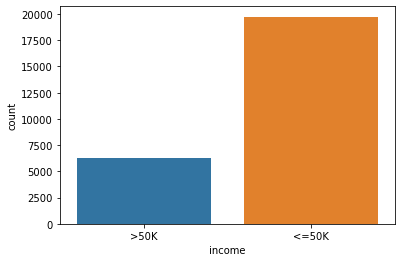

In [9]:
sns.countplot(x='income', data=train)

### 데이터 전처리

In [10]:
train.loc[train['income'] == '>50K', 'target'] = 1
train.loc[train['income'] == '<=50K', 'target'] = 0
train['target'] = train['target'].astype('int')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
 16  target          26049 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 3.3

In [13]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [15]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [20]:
sel = ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

X = train[sel]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=train['target'],
    random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19536, 7), (19536,), (6513, 7), (6513,))

In [46]:
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print('cross validation (f1):', cross_val_score(model, X, y, scoring='f1'))
print('classification report:\n{}'.format(
    classification_report(y_test, pred, target_names=['<=50K', '>50K'])))

matrix = confusion_matrix(y_test, pred)
print(matrix)

acc = (matrix[0][0] + matrix[1][1]) / matrix.sum()
print('acc:', acc)

precision = matrix[1][1] / (matrix[:, 1].sum())
print('precision:', precision)

recall = matrix[1][1] / matrix[1].sum()
print('recall:', recall)

specificity = matrix[0][0] / matrix[0].sum()
print('specificity:', specificity)

fprate = matrix[0][1] / matrix[0].sum()
print('FPRate:', fprate)

train score: 0.7971437346437347
test score: 0.7996315062183326
cross validation (f1): [0.40422164 0.42179837 0.39562967 0.34971998 0.33570966]
classification report:
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      4937
        >50K       0.74      0.27      0.39      1576

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513

[[4789  148]
 [1157  419]]
acc: 0.7996315062183326
precision: 0.7389770723104057
recall: 0.26586294416243655
specificity: 0.9700222807372898
FPRate: 0.02997771926271015


In [35]:
model = RandomForestClassifier(n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print('cross validation (f1):', cross_val_score(model, X, y, scoring='f1'))
print('classification report:\n{}'.format(
    classification_report(y_test, pred, target_names=['<=50K', '>50K'])))
print(confusion_matrix(y_test, pred))

train score: 0.9999488124488124
test score: 0.831260555811454
cross validation (f1): [0.4978903  0.56497175 0.5578635  0.5593618  0.47579855]
classification report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4937
        >50K       0.73      0.48      0.58      1576

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.74      6513
weighted avg       0.82      0.83      0.82      6513

[[4659  278]
 [ 821  755]]


In [47]:
from sklearn.metrics import f1_score


model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print('cross validation (f1):', cross_val_score(model, X, y, scoring='f1'))
print('classification report:\n{}'.format(
    classification_report(y_test, pred, target_names=['<=50K', '>50K'])))
print(confusion_matrix(y_test, pred))
print()
print(f1_score(y_test, pred))

train score: 0.8421887796887797
test score: 0.8429295255642562
cross validation (f1): [0.45735027 0.59040233 0.59229615 0.55825735 0.45666424]
classification report:
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      4937
        >50K       0.80      0.47      0.59      1576

    accuracy                           0.84      6513
   macro avg       0.83      0.71      0.75      6513
weighted avg       0.84      0.84      0.83      6513

[[4757  180]
 [ 843  733]]

0.5889915628766572


In [37]:
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print('cross validation (f1):', cross_val_score(model, X, y, scoring='f1'))
print('classification report:\n{}'.format(
    classification_report(y_test, pred, target_names=['<=50K', '>50K'])))
print(confusion_matrix(y_test, pred))

train score: 0.8183353808353808
test score: 0.7755258713342545
cross validation (f1): [0.28964692 0.33675799 0.2976964  0.29794521 0.32495345]
classification report:
              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.87      4937
        >50K       0.59      0.23      0.33      1576

    accuracy                           0.78      6513
   macro avg       0.69      0.59      0.60      6513
weighted avg       0.75      0.78      0.74      6513

[[4691  246]
 [1216  360]]
